# **DATA PROCESSING**

Our original dataset had this features and dimensions.

```python
Shape:  (247950, 42)
Index(['Type', 'url_length', 'number_of_dots_in_url',
       'having_repeated_digits_in_url', 'number_of_digits_in_url',
       'number_of_special_char_in_url', 'number_of_hyphens_in_url',
       'number_of_underline_in_url', 'number_of_slash_in_url',
       'number_of_questionmark_in_url', 'number_of_equal_in_url',
       'number_of_at_in_url', 'number_of_dollar_in_url',
       'number_of_exclamation_in_url', 'number_of_hashtag_in_url',
       'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain',
       'number_of_hyphens_in_domain', 'having_special_characters_in_domain',
       'number_of_special_characters_in_domain', 'having_digits_in_domain',
       'number_of_digits_in_domain', 'having_repeated_digits_in_domain',
       'number_of_subdomains', 'having_dot_in_subdomain',
       'having_hyphen_in_subdomain', 'average_subdomain_length',
       'average_number_of_dots_in_subdomain',
       'average_number_of_hyphens_in_subdomain',
       'having_special_characters_in_subdomain',
       'number_of_special_characters_in_subdomain',
       'having_digits_in_subdomain', 'number_of_digits_in_subdomain',
       'having_repeated_digits_in_subdomain', 'having_path', 'path_length',
       'having_query', 'having_fragment', 'having_anchor', 'entropy_of_url',
       'entropy_of_domain'],
      dtype='object')
```

<br>

When doing predictions, we cant just feed a raw URL into the model and expect a prediction, the model requires data with a compatible shape. 

This notebooks aims to showcase a pipeline that converts an URL into the tuple expected by the model.

<br>

**NOTE: WE WILL USE THIS FAKE URL TO TEST THAT OUR PREPROCESSING IS WORKING AS INTENDED**

`https://www.example-phishing-site123.com:8080/login/search_results?q=search#&sort=relevance&filter=on#!/comments
`

---


## **Understanding the need to process the data before predicting over an URL**

We have to preprocess our dataset, since we **trained** with already preprocessed data we must follow as closely as possible the preprocessing steps. This will help us ensure that the new urls that we feed into the model are shape-compatible and undergo the same transformations as the training data.

The [original article](https://www.frontiersin.org/articles/10.3389/fcomp.2024.1308634) outlines a process called `Optimal Feature Vectorization Algorithm (OFVA)`.

Below you can find the step by step process of the data preparation undergone by the original dataset, at Figure 1:

<br>

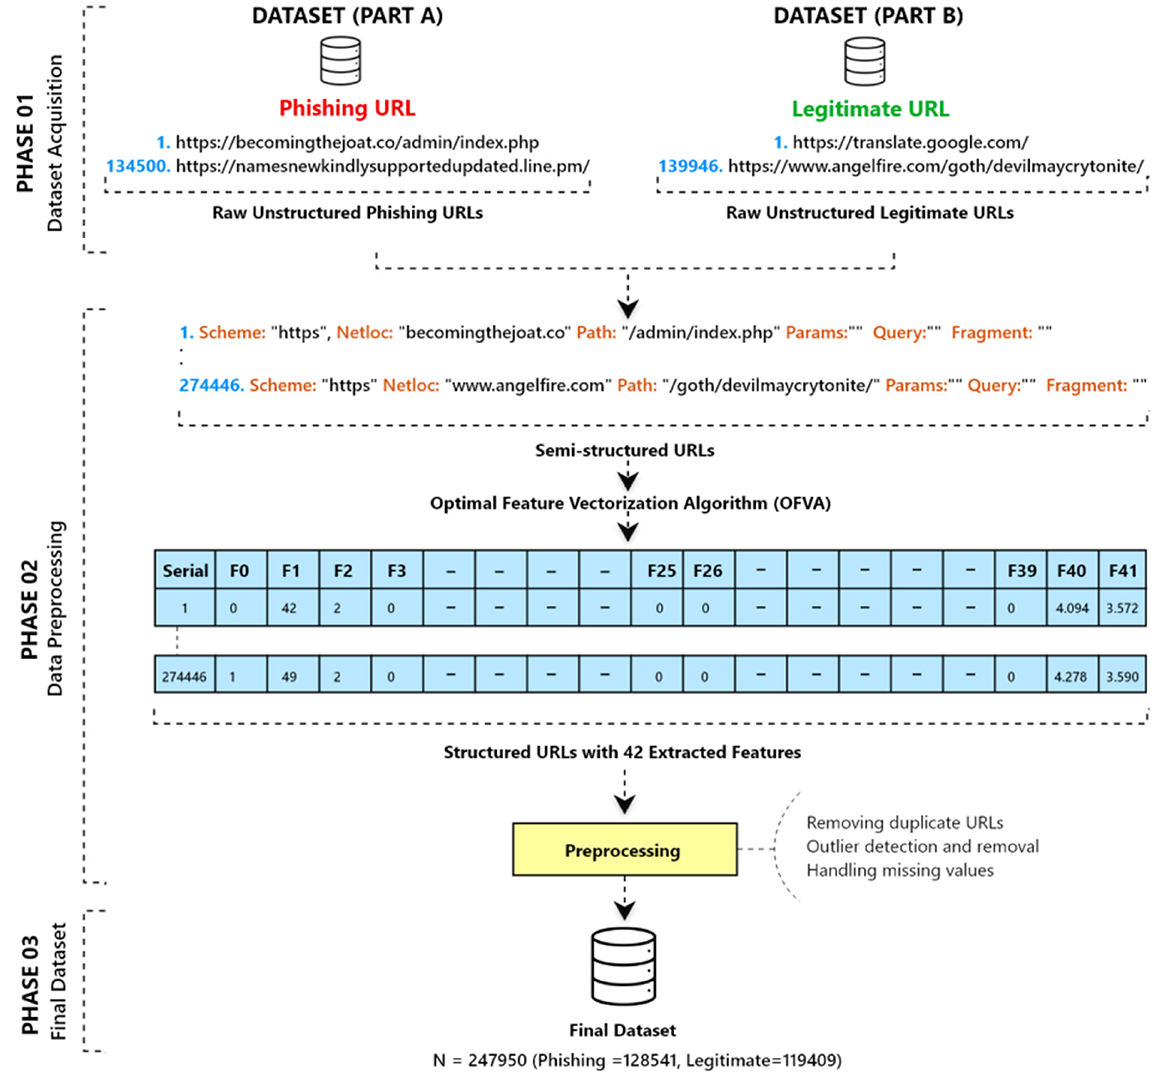
*<center> Figure 1. Step by step process of data preparation. </center>*



And later, although unfortunately **the specific code implementation of the __OVFA__ is not provided**, a *pseudocode implementation* is provided at  Figure 2 below:

<br>

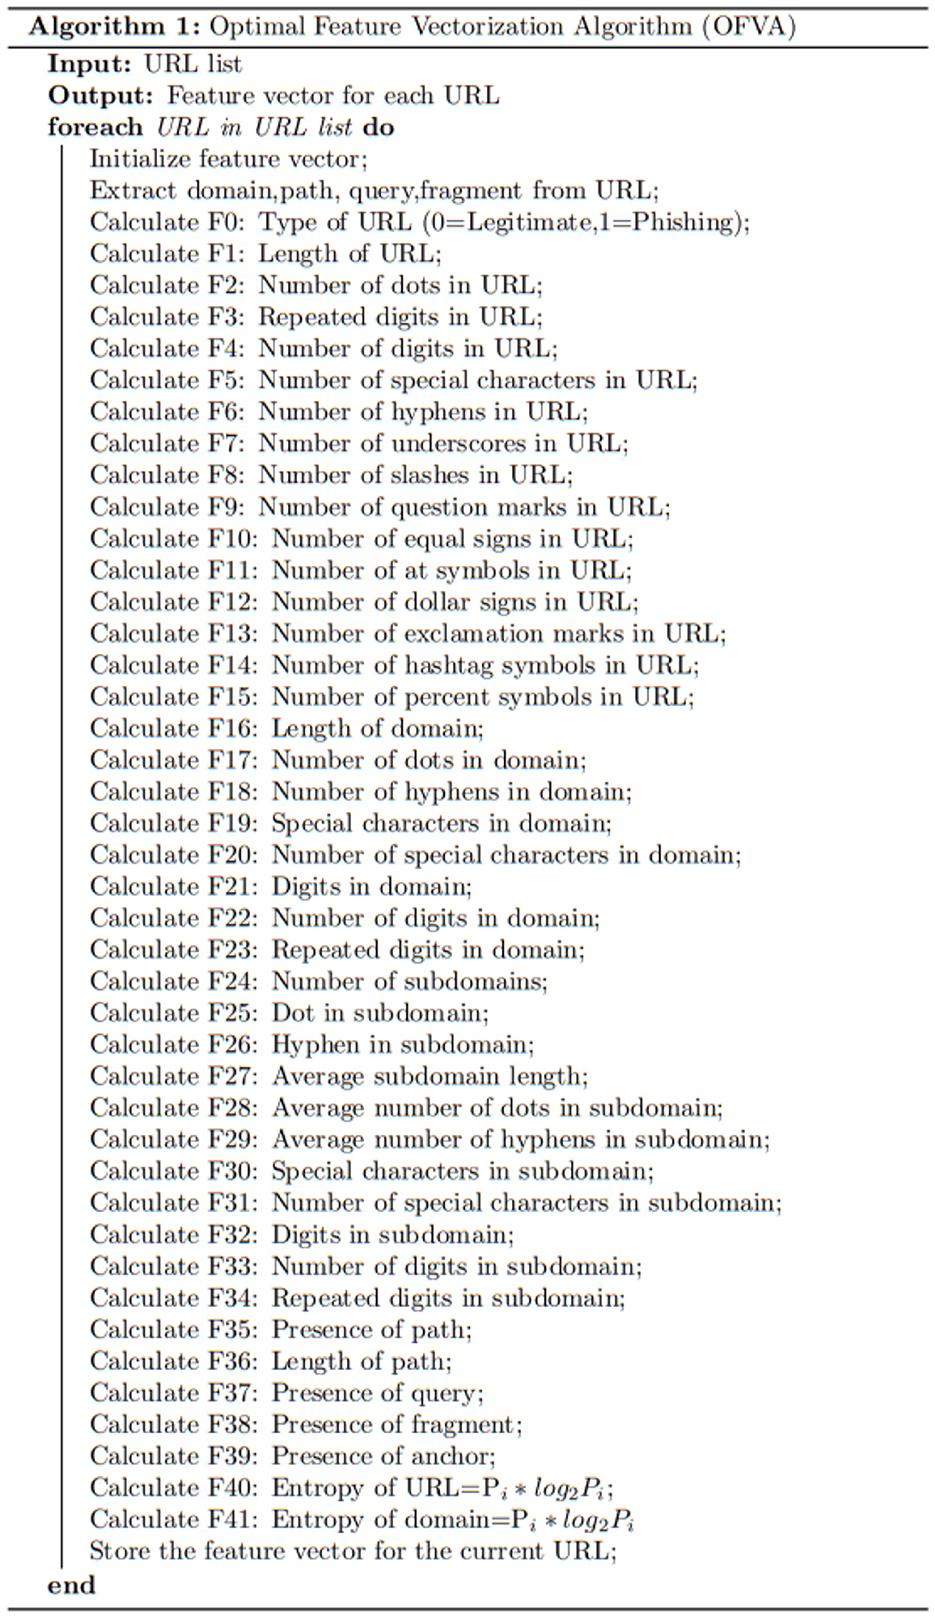
*<center>Figure 2. Optimal feature vectorization algorithm (OFVA)</center>*

<br>

We will follow these steps to recreate the original **data processing** and we will apply it to any url that will undergo prediction by our model.



## **Data Dictionary**


| SN | Feature                   | Description                                                  | Type       |
|----|---------------------------|--------------------------------------------------------------|------------|
| F0 | Type                      | Indicating the type of the URL. It is a Boolean feature with 0 representing a legitimate URL and 1 representing a phishing URL. | Boolean    |
| F1 | url_length                | Representing the number of characters in a URL, including the domain name, path, and any query parameters. | Numeric    |
| F2 | number_of_dots_in_url     | Indicating the number of dots (“.”) in the URL.             | Numeric    |
| F3 | having_repeated_digits_in_url | A Boolean feature that denotes whether the URL has repeated digits (e.g., 22232). | Boolean    |
| F4 | number_of_digits_in_url   | Representing the number of digits (0-9) in the URL.          | Numeric    |
| F5 | number_of_special_char_in_url | Indicating the number of special characters (e.g., “@”, “#”, “$”, “%”, “&”, “-“) in the URL. | Numeric    |
| F6 | number_of_hyphens_in_url  | Representing the number of hyphens (“-”) in the URL.        | Numeric    |
| F7 | number_of_underline_in_url | Indicating the number of underscores (“_”) in the URL.     | Numeric    |
| F8 | number_of_slash_in_url    | Representing the number of forward slashes (“/”) or backward slashes (“\”) in the URL. | Numeric    |
| F9 | number_of_questionmark_in_url | Indicating the number of question marks (“?”) in the URL. | Numeric    |
| F10 | number_of_equal_in_url   | Representing the number of equal signs (“=”) in the URL. It is a numeric feature. | Numeric    |
| F11 | number_of_at_in_url      | Indicating the number of at symbols (“@”) in the URL.       | Numeric    |
| F12 | number_of_dollar_sign_in_url | Representing the number of dollar signs (“$”) in the URL. | Numeric    |
| F13 | number_of_exclamation_in_url | Indicating the number of exclamation marks (“!”) in the URL. | Numeric    |
| F14 | number_of_hashtag_in_url | Representing the number of hashtags (“#”) in the URL.       | Numeric    |
| F15 | number_of_percent_in_url | Indicating the number of percent signs (“%”) in the URL.    | Numeric    |
| F16 | domain_length            | Representing the length of the domain name in the URL.      | Numeric    |
| F17 | number_of_dots_in_domain | Representing the number of hyphens (“-”) in the domain name. | Numeric    |
| F18 | number_of_hyphens_in_domain | It is a Boolean feature that denotes whether the domain name contains special characters (e.g., “@”, “#”, “$”, “%”, “&”, “-“). | Boolean    |
| F19 | having_special_characters_in_domain | Having special characters (e.g., “@”, “#”, “$”, “%”, “&”, “-“) in domain. | Boolean    |
| F20 | number_of_special_characters_in_domain | Indicating the number of special characters in the domain name. | Numeric    |
| F21 | having_digits_in_domain  | It’s a Boolean feature that denotes whether the domain name contains digits (e.g., 0-9). | Boolean    |
| F22 | number_of_digits_in_domain | Representing the number of digits in the domain name.     | Numeric    |
| F23 | having_repeated_digits_in_domain | A Boolean feature that denotes whether the domain name has repeated digits (e.g., 2233321). | Boolean    |
| F24 | number_of_subdomains     | Representing the number of subdomains in the URL.           | Numeric    |
| F25 | having_dot_in_subdomain  | Denoting whether the subdomain contains a dot (“.”).        | Boolean    |
| F26 | having_hyphen_in_subdomain | It’s a Boolean feature that denotes whether the subdomain contains a hyphen (“-”). | Boolean    |
| F27 | average_subdomain_length | Representing the average length of the subdomains in the URL. | Continuous |
| F28 | average_number_of_dots_in_subdomain | Indicating the average number of dots (“.”) in the subdomains. | Continuous |
| F29 | average_number_of_hyphens_in_subdomain | Representing the average number of hyphens (“-”) in subdomains. | Continuous |
| F30 | having_special_characters_in_subdomain | Having special characters (e.g., “@”, “#”, “$”, “%”, “&”, “-“) in subdomain | Boolean    |
| F31 | number_of_special_characters_in_subdomain | Number of special characters (e.g., “@”, “#”, “$”, “%”, “&”, “-“) in the subdomain. | Numeric    |
| F32 | having_digits_in_subdomain | It’s a Boolean feature that denotes whether the subdomain contains special characters (e.g., “@”, “#”, “$”, “%”, “&”, “-“). | Boolean    |
| F33 | number_of_digits_in_subdomain | Representing the number of digits in the subdomain.      | Numeric    |
| F34 | having_repeated_digits_in_subdomain | It’s a Boolean feature that denotes whether the subdomain has repeated digits (e.g., 2233321). | Boolean    |
| F35 | having_path              | Denoting whether the URL has a path.                       | Boolean    |
| F36 | path_length              | Representing the length of the path in the URL.             | Numeric    |
| F37 | having_query             | It’s a Boolean feature that denotes whether the URL has a query. | Boolean    |
| F38 | having_fragment          | It’s a Boolean feature that denotes whether the URL has a fragment. | Boolean    |
| F39 | having_anchor            | It’s a Boolean feature that denotes whether the URL has an anchor. | Boolean    |
| F40 | entropy_of_url           | Representing the Shannon entropy of the URL. It is a continuous feature calculated based on the probabilities of each character in the URL. | Continuous |
| F41 | entropy_of_domain        | Representing the Shannon entropy of the domain. It is a continuous feature calculated based on the probabilities of each character in the domain name. | Continuous |


*<center> Table 1. Data Dictionary </center>*

<br>

---

## **Defining a set of functions to transform an URL**

In [7]:
import re
from collections import OrderedDict
from math import log2
from pprint import pprint
from urllib.parse import urlparse


def parse_url(url):
    """
    Parses a URL and extracts its components.

    Args:
    url (str): The URL to parse.

    Returns:
    dict: A dictionary containing the URL components such as scheme, netloc, path, query, fragment,
          and query parameters as key-value pairs.

    Example:
    For the URL "https://www.example.com:8080/login?user=abc#section",
    the function will return:
    {
        'scheme': 'https',
        'netloc': 'www.example.com:8080',
        'path': '/login',
        'query': 'user=abc',
        'fragment': 'section',
        'params': {'user': ['abc']}
    }
    """
    parsed = urlparse(url)
    
    return {
        'scheme': parsed.scheme,
        'netloc': parsed.netloc,
        'path': parsed.path,
        'params': parsed.params,
        'query': parsed.query,
        'fragment': parsed.fragment
    }

def get_url_length(url):
    """
    Calculates the total length of a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The length of the URL.
    """
    return len(url)

def get_number_of_dots_in_url(url):
    """
    Counts the number of dots in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of dots ('.') in the URL.
    """
    return url.count('.')

def has_repeated_digits_in_url(url):
    """
    Checks if the URL contains repeated consecutive digits.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    bool: True if there are repeated consecutive digits, False otherwise.
    """

    return bool(re.search(r'(\d)\1', url))

def get_number_of_digits_in_url(url):
    """
    Counts the number of digits (0-9) in a URL.

    Args:
    url (str): The complete URL.

    Returns:
    int: The count of digits in the URL.
    """
    return len(re.findall(r'\d', url))

def get_number_of_special_char_in_url(url):
    """
    Counts the number of special characters (e.g., "@", "#", "$", "%", "&", "-") in a URL.

    Args:
    url (str): The complete URL.

    Returns:
    int: The count of special characters in the URL.
    """
    return len(re.findall(r'[@#$%&-]', url))

def get_number_of_hyphens_in_url(url):
    """
    Counts the number of hyphens ("-") in a URL.

    Args:
    url (str): The complete URL.

    Returns:
    int: The count of hyphens in the URL.
    """
    return url.count('-')

def get_number_of_underline_in_url(url):
    """
    Counts the number of underscores in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of underscores ('_') in the URL.
    """
    return url.count('_')

def get_number_of_slash_in_url(url):
    """
    Counts the number of forward and backward slashes in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of slashes ('/' and '\\') in the URL.
    """
    return url.count('/') + url.count('\\')

def get_number_of_questionmark_in_url (url):
    """
    Counts the number of question marks in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of question marks ('?') in the URL.
    """
    return url.count('?')

def get_number_of_equal_in_url(url):
    """
    Counts the number of equal signs in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of equal signs ('=') in the URL.
    """
    return url.count('=')

def get_number_of_at_in_url(url):
    """
    Counts the number of at symbols in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of at symbols ('@') in the URL.
    """
    return url.count('@')

def get_number_of_dollar_in_url(url):
    """
    Counts the number of dollar signs in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of dollar signs ('$') in the URL.
    """
    return url.count('$')


def get_number_of_exclamation_marks_in_url(url):
    """
    Counts the number of exclamation marks in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of exclamation marks ('!') in the URL.
    """
    return url.count('!')

def get_number_of_hashtags_in_url(url):
    """
    Counts the number of hashtags in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of hashtags ('#') in the URL.
    """
    return url.count('#')

def get_number_of_percent_signs_in_url(url):
    """
    Counts the number of percent signs in a URL.
    
    Args:
    url (str): The complete URL.
    
    Returns:
    int: The count of percent signs ('%') in the URL.
    """
    return url.count('%')

def get_domain_length(parsed_url):
    """
    Calculates the length of the domain name from a parsed URL.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    int: The length of the domain name.
    """
    domain = parsed_url['netloc'].split(':')[0]  # Exclude port number if present
    return len(domain)

def get_number_of_dots_in_domain(parsed_url):
    """
    Counts the number of dots in the domain name.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    int: The count of dots ('.') in the domain name.
    """
    domain = parsed_url['netloc'].split(':')[0]
    return domain.count('.')

def has_hyphens_in_domain(parsed_url):
    """
    Checks if the domain name contains hyphens.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    bool: True if there are hyphens ('-') in the domain name, False otherwise.
    """
    domain = parsed_url['netloc'].split(':')[0]
    return '-' in domain

def has_special_characters_in_domain(parsed_url):
    """
    Checks if the domain name contains special characters.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    bool: True if there are special characters in the domain name, False otherwise.
    """
    domain = parsed_url['netloc'].split(':')[0]
    return bool(re.search(r'[@#$%&-]', domain))

def get_number_of_special_characters_in_domain(parsed_url):
    """
    Counts the number of special characters in the domain name.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    int: The count of special characters in the domain name.
    """
    domain = parsed_url['netloc'].split(':')[0]
    return len(re.findall(r'[@#$%&-]', domain))


def has_digits_in_domain(parsed_url):
    """
    Determines if the domain name contains digits.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    bool: True if the domain contains digits, False otherwise.
    """
    domain = parsed_url['netloc'].split(':')[0]  # Exclude port if present
    return bool(re.search(r'\d', domain))

def get_number_of_digits_in_domain(parsed_url):
    """
    Counts the number of digits in the domain name.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    int: The count of digits in the domain name.
    """
    domain = parsed_url['netloc'].split(':')[0]
    return len(re.findall(r'\d', domain))

def has_repeated_digits_in_domain(parsed_url):
    """
    Checks if the domain name has repeated digits.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    bool: True if there are repeated digits in the domain, False otherwise.
    """
    domain = parsed_url['netloc'].split(':')[0]
    return bool(re.search(r'(\d)\1', domain))

def get_number_of_subdomains(parsed_url):
    """
    Counts the number of subdomains in the URL.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    int: The number of subdomains.
    """
    domain = parsed_url['netloc'].split(':')[0].split('.')
    # Count subdomains excluding the main domain (last two parts)
    return len(domain) - 2 if len(domain) > 2 else 0

def has_dot_in_subdomain(parsed_url):
    """
    Determines if any subdomain contains a dot.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    bool: True if a subdomain contains a dot, False otherwise.
    """
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]  # Ignore main domain
    return any('.' in subdomain for subdomain in subdomains)

def has_hyphen_in_subdomain(parsed_url):
    """
    Checks if any subdomain contains a hyphen.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    bool: True if a subdomain contains a hyphen, False otherwise.
    """
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]  # Ignore main domain
    return any('-' in subdomain for subdomain in subdomains)

def get_average_subdomain_length(parsed_url):
    """
    Calculates the average length of subdomains.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    float: Average length of subdomains.
    """
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]  # Ignore main domain
    if subdomains:
        return sum(len(subdomain) for subdomain in subdomains) / len(subdomains)
    return 0.0

def get_average_number_of_dots_in_subdomain(parsed_url):
    """
    Calculates the average number of dots in subdomains.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    float: Average number of dots in subdomains.
    """
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]
    if subdomains:
        return sum(subdomain.count('.') for subdomain in subdomains) / len(subdomains)
    return 0.0

def get_average_number_of_hyphens_in_subdomain(parsed_url):
    """
    Calculates the average number of hyphens in subdomains.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    float: Average number of hyphens in subdomains.
    """
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]
    if subdomains:
        return sum(subdomain.count('-') for subdomain in subdomains) / len(subdomains)
    return 0.0


def has_special_characters_in_subdomain(parsed_url):
    """
    Determines if any subdomain contains special characters.
    
    Args:
    parsed_url (dict): The parsed URL components.
    
    Returns:
    bool: True if any subdomain contains special characters, False otherwise.
    """
    special_chars = re.compile(r'[@#$%&-]')
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]  # Ignore main domain
    return any(special_chars.search(subdomain) for subdomain in subdomains)



def get_number_of_special_characters_in_subdomain(parsed_url):
    """
    Counts the number of special characters in subdomains.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    int: Total count of special characters in the subdomains.
    """
    special_chars = re.compile(r'[@#$%&-]')
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]
    return sum(len(special_chars.findall(subdomain)) for subdomain in subdomains)

def has_digits_in_subdomain(parsed_url):
    """
    Checks if any subdomain contains digits.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    bool: True if any subdomain contains digits, False otherwise.
    """
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]
    return any(re.search(r'\d', subdomain) for subdomain in subdomains)

def get_number_of_digits_in_subdomain(parsed_url):
    """
    Counts the number of digits in subdomains.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    int: Total count of digits in the subdomains.
    """
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]
    return sum(len(re.findall(r'\d', subdomain)) for subdomain in subdomains)

def has_repeated_digits_in_subdomain(parsed_url):
    """
    Checks for repeated consecutive digits in subdomains.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    bool: True if any subdomain has repeated digits, False otherwise.
    """
    subdomains = parsed_url['netloc'].split(':')[0].split('.')[:-2]
    return any(re.search(r'(\d)\1', subdomain) for subdomain in subdomains)

def has_path(parsed_url):
    """
    Determines whether the URL has a path component.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    bool: True if the URL has a path, False otherwise.
    """
    return bool(parsed_url['path'])

def get_path_length(parsed_url):
    """
    Measures the length of the path in the URL.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    int: The length of the path.
    """
    return len(parsed_url['path'])

def has_query(parsed_url):
    """
    Checks if the URL contains a query string.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    bool: True if there is a query string, False otherwise.
    """
    return bool(parsed_url['query'])

def has_fragment(parsed_url):
    """
    Checks if the URL contains a fragment.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    bool: True if there is a fragment, False otherwise.
    """
    return bool(parsed_url['fragment'])

def has_anchor(parsed_url):
    """
    Determines if the URL includes an anchor (often part of the fragment).

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    bool: True if an anchor is present, False otherwise.
    """
    return '#' in parsed_url['fragment']

def calculate_entropy(text):
    """
    Calculates the Shannon entropy of a string.

    Args:
    text (str): The input text for which to calculate entropy.

    Returns:
    float: The Shannon entropy of the input text.
    """
    if not text:
        return 0
    probability = {x: text.count(x) / len(text) for x in set(text)}
    entropy = -sum(p * log2(p) for p in probability.values())
    return entropy

def get_entropy_of_url(url):
    """
    Calculates the Shannon entropy of the entire URL.

    Args:
    url (str): The complete URL.

    Returns:
    float: The entropy of the URL.
    """
    return calculate_entropy(url)

def get_entropy_of_domain(parsed_url):
    """
    Calculates the Shannon entropy of the domain name in the URL.

    Args:
    parsed_url (dict): The parsed URL components.

    Returns:
    float: The entropy of the domain name.
    """
    domain = parsed_url['netloc'].split(':')[0]  # Exclude port if present
    return calculate_entropy(domain)



In [8]:
## first we parse the url as described on step 2 to extract the domain, path, query and fragment

url = "https://www.example-phishing-site123.com:8080/login/search_results?q=search#&sort=relevance&filter=on#!/comments"
parsed_url= parse_url(url)

type(parsed_url)


dict

In [9]:
pprint(parsed_url)

print(parsed_url.keys())
print(parsed_url['netloc'].split(':')[0])

{'fragment': '&sort=relevance&filter=on#!/comments',
 'netloc': 'www.example-phishing-site123.com:8080',
 'params': '',
 'path': '/login/search_results',
 'query': 'q=search',
 'scheme': 'https'}
dict_keys(['scheme', 'netloc', 'path', 'params', 'query', 'fragment'])
www.example-phishing-site123.com


In [10]:
## we create the preprocessed url dictionary

preprocessed_url = OrderedDict()

preprocessed_url['url_length'] = get_url_length(url)
preprocessed_url['number_of_dots_in_url'] = get_number_of_dots_in_url(url)
preprocessed_url['having_repeated_digits_in_url'] = has_repeated_digits_in_url(url)
preprocessed_url['number_of_digits_in_url'] = get_number_of_digits_in_url(url)
preprocessed_url['number_of_special_char_in_url'] = get_number_of_special_char_in_url(url)
preprocessed_url['number_of_hyphens_in_url'] = get_number_of_hyphens_in_url(url)
preprocessed_url['number_of_underline_in_url'] = get_number_of_underline_in_url(url)
preprocessed_url['number_of_slash_in_url'] = get_number_of_slash_in_url(url)
preprocessed_url['number_of_questionmark_in_url'] = get_number_of_questionmark_in_url (url)
preprocessed_url['number_of_equal_in_url'] = get_number_of_equal_in_url(url)
preprocessed_url['number_of_at_in_url'] = get_number_of_at_in_url (url)
preprocessed_url['number_of_dollar_in_url'] = get_number_of_dollar_in_url(url)
preprocessed_url['number_of_exclamation_in_url'] = get_number_of_exclamation_marks_in_url(url)
preprocessed_url['number_of_hashtag_in_url'] = get_number_of_hashtags_in_url(url)
preprocessed_url['number_of_percent_in_url'] = get_number_of_percent_signs_in_url(url)
preprocessed_url['domain_length'] = get_domain_length(parsed_url)
preprocessed_url['number_of_dots_in_domain'] = get_number_of_dots_in_domain(parsed_url)
preprocessed_url['number_of_hyphens_in_domain'] = has_hyphens_in_domain(parsed_url)
preprocessed_url['having_special_characters_in_domain'] = has_special_characters_in_domain(parsed_url)
preprocessed_url['number_of_special_characters_in_domain'] = get_number_of_special_characters_in_domain(parsed_url)
preprocessed_url['having_digits_in_domain'] = has_digits_in_domain(parsed_url)
preprocessed_url['number_of_digits_in_domain'] = get_number_of_digits_in_domain(parsed_url)
preprocessed_url['having_repeated_digits_in_domain'] = has_repeated_digits_in_domain(parsed_url)
preprocessed_url['number_of_subdomains'] = get_number_of_subdomains(parsed_url)
preprocessed_url['having_dot_in_subdomain'] = has_dot_in_subdomain(parsed_url)
preprocessed_url['having_hyphen_in_subdomain'] = has_hyphen_in_subdomain(parsed_url)
preprocessed_url['average_subdomain_length'] = get_average_subdomain_length(parsed_url)
preprocessed_url['average_number_of_dots_in_subdomain'] = get_average_number_of_dots_in_subdomain(parsed_url)
preprocessed_url['average_number_of_hyphens_in_subdomain'] = get_average_number_of_hyphens_in_subdomain(parsed_url)
preprocessed_url['having_special_characters_in_subdomain'] = has_special_characters_in_subdomain(parsed_url)
preprocessed_url['number_of_special_characters_in_subdomain'] = get_number_of_special_characters_in_subdomain(parsed_url)
preprocessed_url['having_digits_in_subdomain'] = has_digits_in_subdomain(parsed_url)
preprocessed_url['number_of_digits_in_subdomain'] = get_number_of_digits_in_subdomain(parsed_url)
preprocessed_url['having_repeated_digits_in_subdomain'] = has_repeated_digits_in_subdomain(parsed_url)
preprocessed_url['having_path'] = has_path(parsed_url)
preprocessed_url['path_length'] = get_path_length(parsed_url)
preprocessed_url['having_query'] = has_query(parsed_url)
preprocessed_url['having_fragment'] = has_fragment(parsed_url)
preprocessed_url['having_anchor'] = has_anchor(parsed_url)
preprocessed_url['entropy_of_url'] = get_entropy_of_url(url)
preprocessed_url['entropy_of_domain'] = get_entropy_of_domain(parsed_url)



# Print the dictionary to verify successful addition of features
pprint(preprocessed_url)
print("Dict len: ", len(preprocessed_url.keys()))

OrderedDict([('url_length', 112),
             ('number_of_dots_in_url', 2),
             ('having_repeated_digits_in_url', False),
             ('number_of_digits_in_url', 7),
             ('number_of_special_char_in_url', 6),
             ('number_of_hyphens_in_url', 2),
             ('number_of_underline_in_url', 1),
             ('number_of_slash_in_url', 5),
             ('number_of_questionmark_in_url', 1),
             ('number_of_equal_in_url', 3),
             ('number_of_at_in_url', 0),
             ('number_of_dollar_in_url', 0),
             ('number_of_exclamation_in_url', 1),
             ('number_of_hashtag_in_url', 2),
             ('number_of_percent_in_url', 0),
             ('domain_length', 32),
             ('number_of_dots_in_domain', 2),
             ('number_of_hyphens_in_domain', True),
             ('having_special_characters_in_domain', True),
             ('number_of_special_characters_in_domain', 2),
             ('having_digits_in_domain', True),
         

In [11]:
## function so we dont have to do all that each time lol

def preprocess_url_features(url):
    """
    Processes a URL to extract various features and returns them in an ordered dictionary.
    
    Args:
    url (str): The URL to be processed.
    
    Returns:
    OrderedDict: A dictionary containing all the extracted features in a defined order.
    The order is defined at this DOI:
    
        Front. Comput. Sci., 06 March 2024
        Sec. Computer Security
        Volume 6 - 2024 | https://doi.org/10.3389/fcomp.2024.1308634
    """
    parsed_url = parse_url(url)
    
    preprocessed_url = OrderedDict()

    preprocessed_url['url_length'] = get_url_length(url)
    preprocessed_url['number_of_dots_in_url'] = get_number_of_dots_in_url(url)
    preprocessed_url['having_repeated_digits_in_url'] = has_repeated_digits_in_url(url)
    preprocessed_url['number_of_digits_in_url'] = get_number_of_digits_in_url(url)
    preprocessed_url['number_of_special_char_in_url'] = get_number_of_special_char_in_url(url)
    preprocessed_url['number_of_hyphens_in_url'] = get_number_of_hyphens_in_url(url)
    preprocessed_url['number_of_underline_in_url'] = get_number_of_underline_in_url(url)
    preprocessed_url['number_of_slash_in_url'] = get_number_of_slash_in_url(url)
    preprocessed_url['number_of_questionmark_in_url'] = get_number_of_questionmark_in_url (url)
    preprocessed_url['number_of_equal_in_url'] = get_number_of_equal_in_url(url)
    preprocessed_url['number_of_at_in_url'] = get_number_of_at_in_url (url)
    preprocessed_url['number_of_dollar_in_url'] = get_number_of_dollar_in_url(url)
    preprocessed_url['number_of_exclamation_in_url'] = get_number_of_exclamation_marks_in_url(url)
    preprocessed_url['number_of_hashtag_in_url'] = get_number_of_hashtags_in_url(url)
    preprocessed_url['number_of_percent_in_url'] = get_number_of_percent_signs_in_url(url)
    preprocessed_url['domain_length'] = get_domain_length(parsed_url)
    preprocessed_url['number_of_dots_in_domain'] = get_number_of_dots_in_domain(parsed_url)
    preprocessed_url['number_of_hyphens_in_domain'] = has_hyphens_in_domain(parsed_url)
    preprocessed_url['having_special_characters_in_domain'] = has_special_characters_in_domain(parsed_url)
    preprocessed_url['number_of_special_characters_in_domain'] = get_number_of_special_characters_in_domain(parsed_url)
    preprocessed_url['having_digits_in_domain'] = has_digits_in_domain(parsed_url)
    preprocessed_url['number_of_digits_in_domain'] = get_number_of_digits_in_domain(parsed_url)
    preprocessed_url['having_repeated_digits_in_domain'] = has_repeated_digits_in_domain(parsed_url)
    preprocessed_url['number_of_subdomains'] = get_number_of_subdomains(parsed_url)
    preprocessed_url['having_dot_in_subdomain'] = has_dot_in_subdomain(parsed_url)
    preprocessed_url['having_hyphen_in_subdomain'] = has_hyphen_in_subdomain(parsed_url)
    preprocessed_url['average_subdomain_length'] = get_average_subdomain_length(parsed_url)
    preprocessed_url['average_number_of_dots_in_subdomain'] = get_average_number_of_dots_in_subdomain(parsed_url)
    preprocessed_url['average_number_of_hyphens_in_subdomain'] = get_average_number_of_hyphens_in_subdomain(parsed_url)
    preprocessed_url['having_special_characters_in_subdomain'] = has_special_characters_in_subdomain(parsed_url)
    preprocessed_url['number_of_special_characters_in_subdomain'] = get_number_of_special_characters_in_subdomain(parsed_url)
    preprocessed_url['having_digits_in_subdomain'] = has_digits_in_subdomain(parsed_url)
    preprocessed_url['number_of_digits_in_subdomain'] = get_number_of_digits_in_subdomain(parsed_url)
    preprocessed_url['having_repeated_digits_in_subdomain'] = has_repeated_digits_in_subdomain(parsed_url)
    preprocessed_url['having_path'] = has_path(parsed_url)
    preprocessed_url['path_length'] = get_path_length(parsed_url)
    preprocessed_url['having_query'] = has_query(parsed_url)
    preprocessed_url['having_fragment'] = has_fragment(parsed_url)
    preprocessed_url['having_anchor'] = has_anchor(parsed_url)
    preprocessed_url['entropy_of_url'] = get_entropy_of_url(url)
    preprocessed_url['entropy_of_domain'] = get_entropy_of_domain(parsed_url)

    return preprocessed_url


---

<br>

## Example of preprocessing for any new URL



In [13]:
import joblib

# Load the pre-trained model
model = joblib.load('phishing_probability_predictor_model.pkl')


In [12]:
import pandas as pd


url = "https://www.example-phishing-site123.com:8080/login/search_results?q=search#&sort=relevance&filter=on#!/comments"


# Preprocess the URL to extract features
features = preprocess_url_features(url)

# Convert the ordered dictionary of features to a DataFrame or other required format
features_df = pd.DataFrame([features])

features_df


,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,112,2,False,7,6,2,1,5,1,3,...,False,0,False,True,21,True,True,True,4.760244,4.179229


In [17]:
# Predict the probability that the URL is phishing
predictions = model.predict_proba(features_df)[:, 1]  # Assuming the phishing class is at index 1

# Convert probability to percentage
phishing_probability = predictions[0] * 100.

# Print the phishing probability
print(f"The probability that the URL is phishing is {phishing_probability:.3f}%")

# Set the threshold
threshold = 70.0

# Determine if the prediction exceeds the threshold
if phishing_probability >= threshold:
    print("The URL is classified as phishing.")
else:
    print("The URL is classified as not phishing.")



The probability that the URL is phishing is 99.998%


---

## **Superficial experiments with some visualizations on common urls**

Lets create a set of common urls to see the process.



In [21]:
import pandas as pd

urls_to_test = [
    "https://www.google.com",
    "https://www.amazon.com",
    "https://www.facebook.com",
    "https://www.wikipedia.org",
    "https://www.youtube.com",
    "https://www.twitter.com",
    "https://www.linkedin.com",
    "https://www.instagram.com",
    "https://www.netflix.com",
    "https://www.github.com",
    "http://secure-google.com/login/",
    "https://www.amazon-signin.secure-payments.com/",
    "https://facebook-profiles.com/login",
    "http://update-wikipedia.org",
    "https://youtube.free-gifts.xyz",
    "http://twitter.secure-login.info",
    "https://linkedin-mails.com/profile",
    "https://instagram-offers.com/login",
    "http://netflix-account.com/billing",
    "https://github-access.com/login"
]


# Iterate through each URL and predict its class
for url in urls_to_test:
    features = preprocess_url_features(url)  # Process URL to extract features
    features_df = pd.DataFrame([features])   # Convert dictionary of features into a DataFrame
    prediction_proba = model.predict_proba(features_df)[0, 1]  # Predict the probability of phishing
    print(f"URL: {url}\nPhishing Probability: {prediction_proba * 100:.2f}%\n")

URL: https://www.google.com
Phishing Probability: 42.58%

URL: https://www.amazon.com
Phishing Probability: 43.02%

URL: https://www.facebook.com
Phishing Probability: 27.06%

URL: https://www.wikipedia.org
Phishing Probability: 48.21%

URL: https://www.youtube.com
Phishing Probability: 36.95%

URL: https://www.twitter.com
Phishing Probability: 61.81%

URL: https://www.linkedin.com
Phishing Probability: 10.20%

URL: https://www.instagram.com
Phishing Probability: 60.12%

URL: https://www.netflix.com
Phishing Probability: 14.62%

URL: https://www.github.com
Phishing Probability: 41.44%

URL: http://secure-google.com/login/
Phishing Probability: 97.46%

URL: https://www.amazon-signin.secure-payments.com/
Phishing Probability: 75.61%

URL: https://facebook-profiles.com/login
Phishing Probability: 98.22%

URL: http://update-wikipedia.org
Phishing Probability: 99.09%

URL: https://youtube.free-gifts.xyz
Phishing Probability: 84.65%

URL: http://twitter.secure-login.info
Phishing Probability

## **WHAT CAN WE SEE?**

1. **High Confidence in Phishing Detection**

    The model predicts very high probabilities for URLs designed to mimic phishing behavior. For example, http://update-wikipedia.org and https://linkedin-mails.com/profile have probabilities above 99%, indicating strong model confidence in identifying clear phishing patterns.

    This aligns well with our model's high F1 Score and recall, suggesting effective detection of positive (phishing) cases without many false negatives.

2. **Legitimate Sites and False Positives**

    Our  model shows varied probabilities for legitimate sites, with some like https://www.linkedin.com correctly identified as non-phishing with low probabilities (10.20%), whereas others like https://www.twitter.com show unexpectedly high probabilities (61.81%).

    This variability in prediction for legitimate sites may indicate potential false positives, where a legitimate site is misclassified as phishing. This could be a result of specific URL features that mimic those commonly found in phishing URLs, or the model might be overly sensitive to certain legitimate URL patterns.


---

<br>

## **WHAT CAN WE DO TO ADDRESS THESE PROBLEMS?**


1. **Move to a more complex model**: This under the assumption that a more complex model will be able to capture more nuanced patterns in the URL, thus better differentiating between legit urls and legit-looking urls.

    **1.1. Proposal #1:** Train some deep learning models that work best with sequential tasks (like **LSTMs**)

    **1.2. Proposal #2:** Going crazy and trying unorthodox approaches, for example a CNN personalized architecture (typically used for image data) but increasing the dimensionality of our training data to see if we are able to capture higher level features with the convolutional features offered.

2. **Modifying the Classification Threshold:** We can take advantage that our model has a high sensitivity to phishing URLs and thus we could increase the threshold on which our model classifies an URL as phishing or not.

    For example, if we have twitter at 61% of being phishing, but most of the true phishing cites are over 80%, we could pick a high confidence threshold to classify something as phishing or not phishing. This threshold should be defined after doing a statistical analysis of the predictions done by our model.